<a href="https://colab.research.google.com/github/LeonardCT/palletsAndina/blob/main/test_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Oct  8 21:25:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
import os
import sys

In [21]:
HOME= os.getcwd()
print("Home:",HOME)

Home: /content/weights


In [22]:
%cd {HOME}

!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content/weights
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-k6479tya
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-k6479tya
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [23]:

!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

In [24]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

/content/weights
/content/weights/weights


In [25]:
CHECKPOINT_PATH= os.path.join(HOME, "weights",'sam_vit_h_4b8939.pth')
print(CHECKPOINT_PATH, ";exist", os.path.isfile(CHECKPOINT_PATH))

/content/weights/weights/sam_vit_h_4b8939.pth ;exist True


In [27]:
import torch
DEVICE= torch.device('cuda:0' if torch.cuda.is_available() else'cpu')
MODEL_TYPE='vit_h'

In [28]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [29]:
mask_generator= SamAutomaticMaskGenerator(sam)

In [40]:
import os

%cd {HOME}

IMAGE_NAME = "666.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

/content/weights


In [42]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

In [43]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


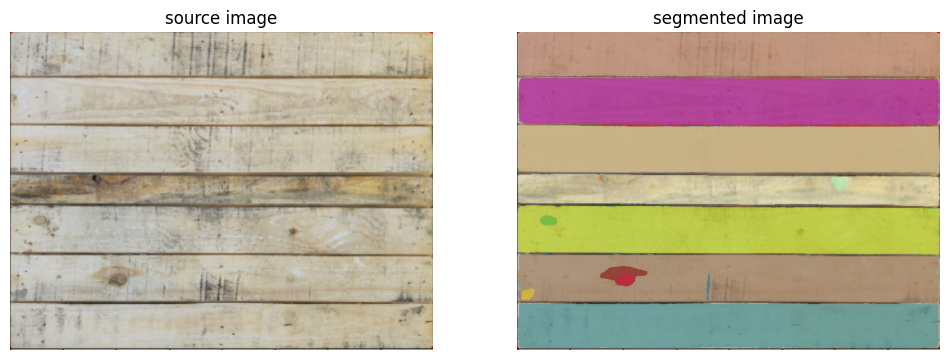

In [47]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)


mask_annotator = sv.MaskAnnotator(color_map='index')

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [58]:
from ultralytics.models.sam import Predictor as SAMPredictor

# Create SAMPredictor
overrides = dict(conf=0.25, task='segment', mode='predict', imgsz=1024, model="mobile_sam.pt")
predictor = SAMPredictor(overrides=overrides)

# Set image
predictor.set_image("ultralytics/assets/zidane.jpg")  # set with image file
predictor.set_image(cv2.imread("ultralytics/assets/zidane.jpg"))  # set with np.ndarray
results = predictor(bboxes=[439, 437, 524, 709])
results = predictor(points=[900, 370], labels=[1])

# Reset image
predictor.reset_image()

ModuleNotFoundError: ignored